### Example Implementation of the testing pipeline

In [16]:
from preprocessing import *
from evaluation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

c:\Users\Patrick Rohrbeck\Documents\Projekte\BIS\bis_capstone_project\src\preprocessing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['month'].apply(month_to_datestring)
c:\Users\Patrick Rohrbeck\Documents\Projekte\BIS\bis_capstone_project\src\preprocessing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%m/%y')


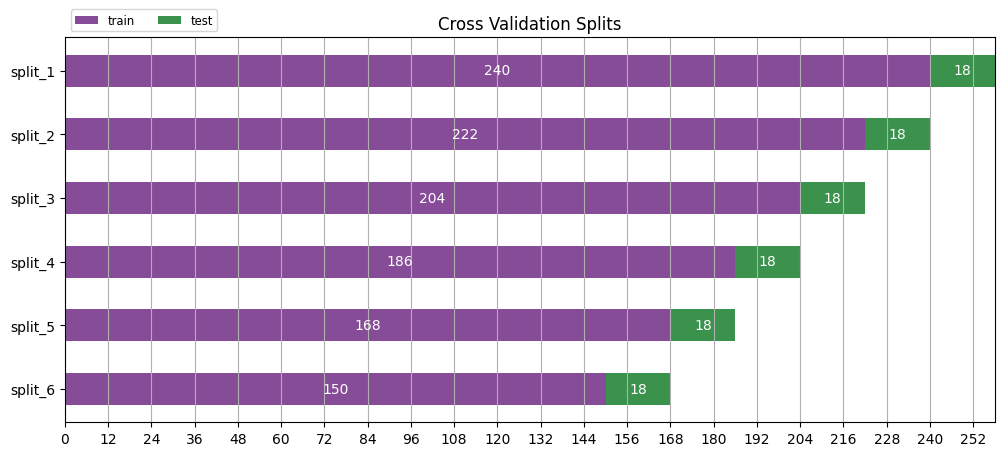

In [25]:
# import data
df = pd.read_csv('../kitCapstoneJan24_data.csv', delimiter=';')
country_a = df[df["countryname"] == "Country A"]
country_a = convert_month_to_date(country_a)

# split the data
splits = create_splits(country_a, overlap=0, n_splits=6)

In [26]:
results = []

for split in splits:
    train = split['train']
    test = split['test']

    #### Train your model in here and make predictions ####
    from sklearn.impute import SimpleImputer

    target_col = "sales_actuals_monthly__vehiclegroup01__orderintake"

    top_columns = ['leasing_contracts__vehiclegroup23__end',
                    'leasing_contracts__vehiclegroup06__end',
                    'global_economy__nominal_statistical_discrepancy_lcu__euro',
                    'global_economy__nominal_statistical_discrepancy_euro__euro',
                    'global_economy__nominal_statistical_discrepancy_ppp__u_s_dollar',
                    'global_economy__nominal_statistical_discrepancy_us__u_s_dollar',
                    'global_economy__bop_other_investment_asset_debit_capital_outflow_lcu__euro',
                    'global_economy__bop_other_investment_asset_debit_capital_outflow_euro__euro',
                    'global_economy__bop_other_investment_liability_credit_capital_inflow_euro__euro',
                    'global_economy__bop_other_investment_liability_credit_capital_inflow_lcu__euro',
                    'global_economy__bop_direct_investment_asset_debit_capital_outflow_lcu__euro',
                    'global_economy__bop_direct_investment_asset_debit_capital_outflow_euro__euro',
                    'global_consumer__total_population_20_to_24',
                    'global_consumer__female_population_20_to_24',
                    'leasing_contracts__vehiclegroup24__end',
                    'global_economy__bop_portfolio_investment_asset_debit_capital_outflow_lcu__euro',
                    'global_economy__bop_portfolio_investment_asset_debit_capital_outflow_euro__euro',
                    'leasing_contracts__vehiclegroup25__end',
                    'leasing_contracts__vehiclegroup63__end',
                    'global_economy__index_retail_sales_real_volume__index',
                    'global_consumer__total_female_population']
    
    train[target_col] = train[target_col].astype(int)
    
    start=len(train)
    end=len(train)+len(test)-1

    imputer = SimpleImputer()
    exog_train = train[top_columns]
    exog_train = imputer.fit_transform(exog_train)

    sarimax_model = SARIMAX(train[target_col], order=(3, 0, 1), seasonal=(3,0,1,12), exog=exog_train)
    model = sarimax_model.fit()

    imputer = SimpleImputer()
    exog_test = test[top_columns]
    exog_test = imputer.fit_transform(exog_test)

    pred = model.predict(start=start, end=end, dynamic=True, exog=exog_test)

    #### Train your model in here and make predictions #####

    test['prediction'] = pred
    results.append(test)

c:\Users\Patrick Rohrbeck\AppData\Local\miniconda3\envs\BIS\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Patrick Rohrbeck\AppData\Local\miniconda3\envs\BIS\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Patrick Rohrbeck\AppData\Local\miniconda3\envs\BIS\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Patrick Rohrbeck\AppData\Local\miniconda3\envs\BIS\Lib\site-packages\statsmodels\tsa\statespace\represe

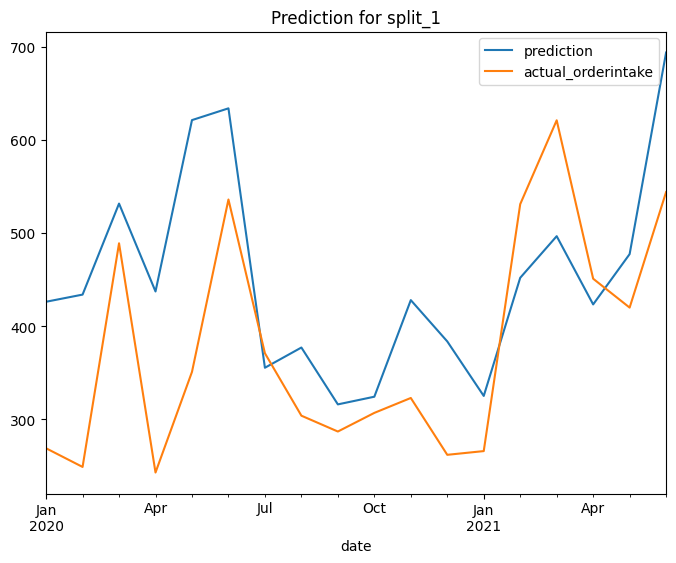

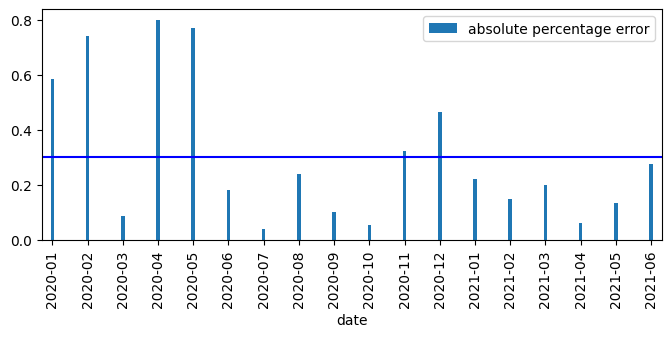

Prediction mean: 452.0755061747399
MAPE: 0.30230460845883256
_________________________________________________________________________________________


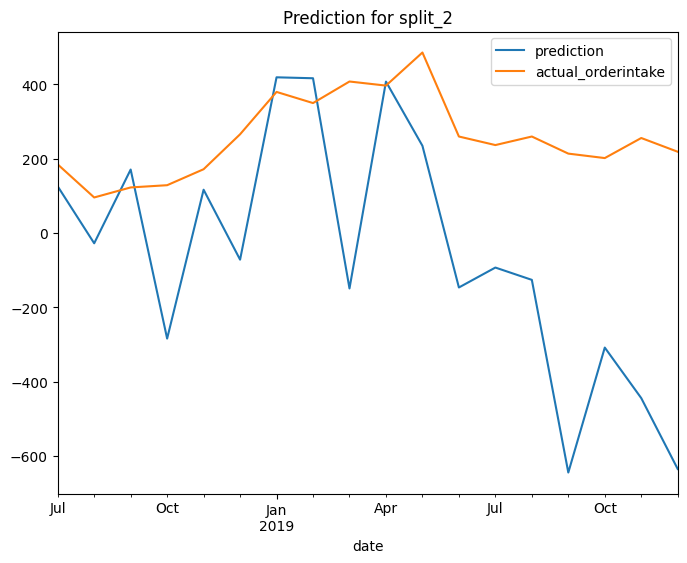

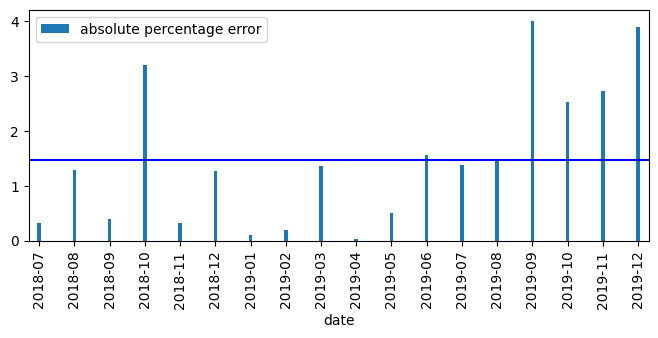

Prediction mean: -57.40403417264268
MAPE: 1.477063404739128
_________________________________________________________________________________________


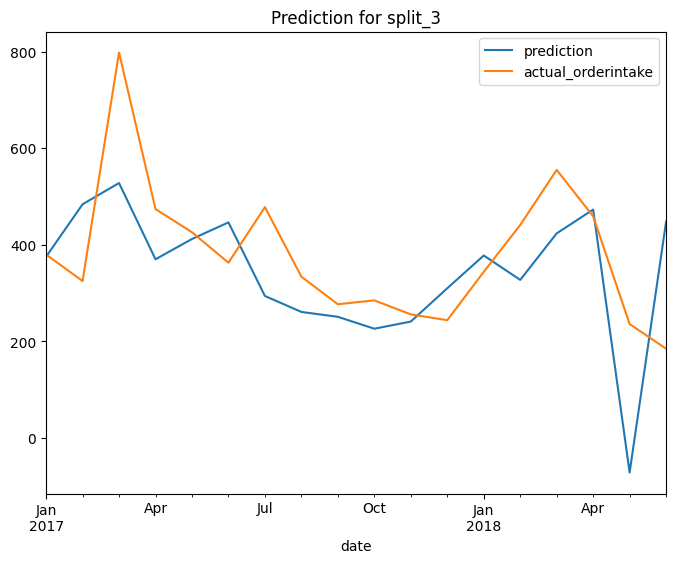

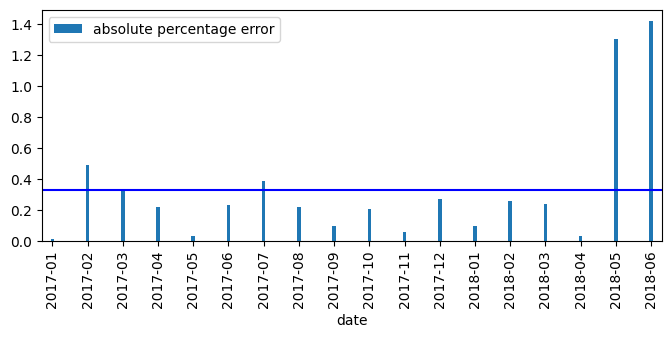

Prediction mean: 343.2195003408079
MAPE: 0.3277296187770974
_________________________________________________________________________________________


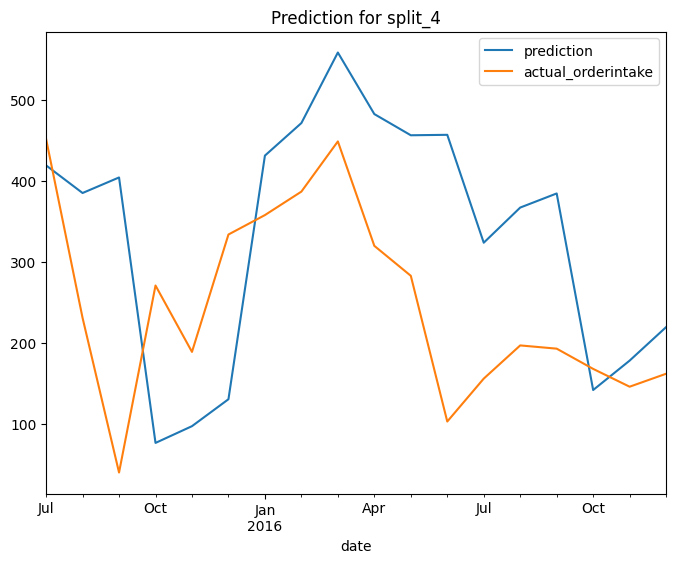

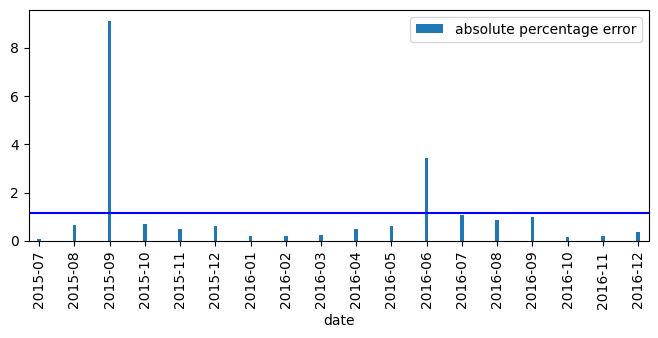

Prediction mean: 332.63843503251445
MAPE: 1.14211842054628
_________________________________________________________________________________________


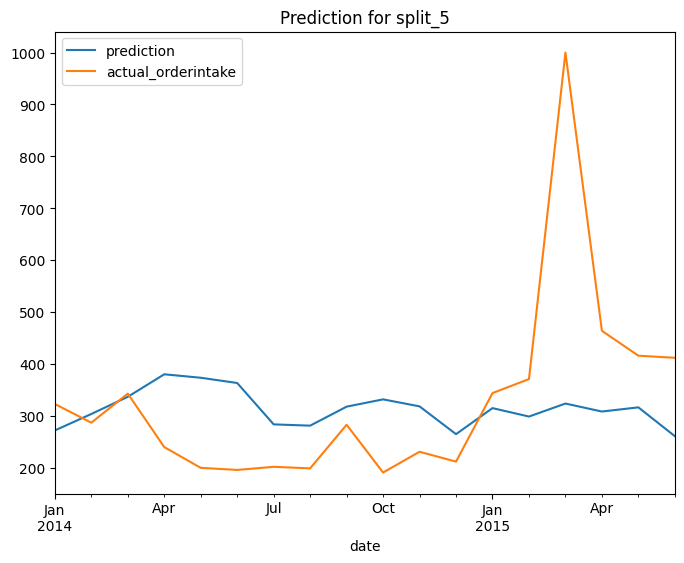

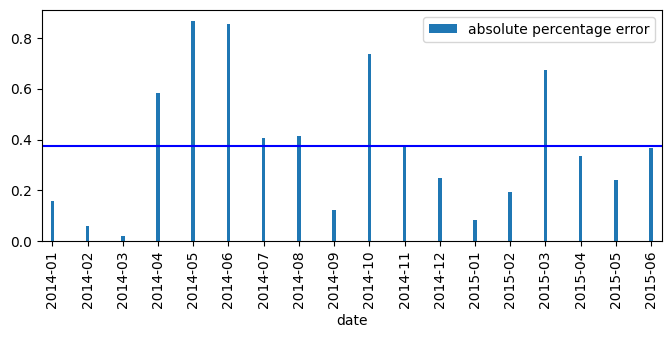

Prediction mean: 313.9824480712697
MAPE: 0.37460258014076075
_________________________________________________________________________________________


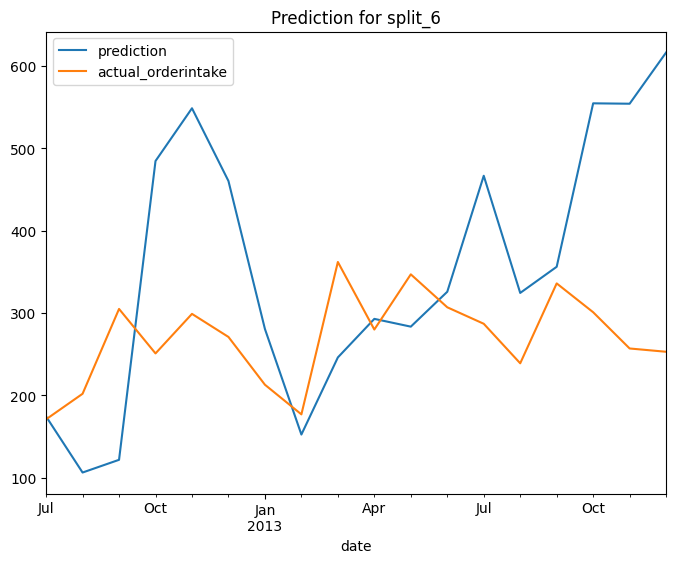

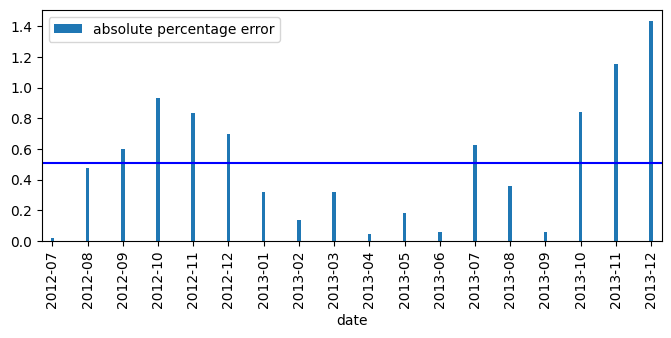

Prediction mean: 352.78529220516765
MAPE: 0.505723927801427
_________________________________________________________________________________________
Overall Result: 0.6882570934105877


In [27]:
evaluate(results)